In [1]:
import pandas as pd
import numpy as np
import random
from datetime import datetime, timedelta

# Set seed for reproducibility
random.seed(42) # esnures the generated values are the same each time we run the code 
np.random.seed(42)

# Generate 90 days starting from today
start_date = datetime.today()  #Todays date 
days = 90 # number of  days u want to simulate 
dates = [start_date - timedelta(days=x) for x in range(days)] # create a list of  the last 90days from todaybackwards
dates.sort()

# Initialize lists, You’ll store daily data in these lists. Later, these lists become columns in a DataFrame
weights = []
body_fats = []
calories = []
proteins = []
workouts = []
sleep_hours = []
steps = []

# Starting values
weight = 75  # kg
body_fat = 18  # %
workout_types = ['Push', 'Pull', 'Legs', 'Rest', 'Cardio']

for i in range(days):
    # Simulate fluctuations
    calorie = np.random.normal(2700, 200)
    protein = np.random.normal(150, 15)
    workout = random.choices(workout_types, weights=[2, 2, 2, 1, 1])[0]
    sleep = np.random.normal(7, 1)
    step = np.random.randint(5000, 15000)
    
    # Simulate weight and body fat changes based on calories and workout
    if workout != "Rest":
        weight_change = np.random.normal(-0.03, 0.1)
        fat_change = np.random.normal(-0.02, 0.05)
    else:
        weight_change = np.random.normal(0.02, 0.1)
        fat_change = np.random.normal(0.01, 0.05)

    weight = round(weight + weight_change, 2)
    body_fat = round(body_fat + fat_change, 2)

    # Add to lists
    weights.append(weight)
    body_fats.append(body_fat)
    calories.append(round(calorie, 1))
    proteins.append(round(protein, 1))
    workouts.append(workout)
    sleep_hours.append(round(sleep, 1))
    steps.append(step)

# Create DataFrame
df = pd.DataFrame({
    'Date': dates,
    'Weight (kg)': weights,
    'Body Fat (%)': body_fats,
    'Calories': calories,
    'Protein (g)': proteins,
    'Workout Type': workouts,
    'Sleep (hrs)': sleep_hours,
    'Steps': steps
})

# Save to CSV
df.to_csv("mock_fitness_data.csv", index=False)
print("Mock dataset generated and saved as 'mock_fitness_data.csv'.")




Mock dataset generated and saved as 'mock_fitness_data.csv'.


In [33]:
# Preview first 5 rows
print(df.head())

                        Date  Weight (kg)  Body Fat (%)  Calories  \
0 2025-03-04 12:01:51.530754        75.12         17.93    2799.3   
1 2025-03-05 12:01:51.530754        75.04         17.94    2675.2   
2 2025-03-06 12:01:51.530754        74.82         17.87    2607.3   
3 2025-03-07 12:01:51.530754        74.81         17.81    2762.8   
4 2025-03-08 12:01:51.530754        74.77         17.76    2728.5   

   Protein (g) Workout Type  Sleep (hrs)  Steps  
0        147.9         Legs          7.6  10734  
1        119.8         Push          6.5  13322  
2        143.0         Pull          7.2  13666  
3        136.4         Push          5.6   5189  
4        149.5         Legs          8.1  13838  


In [34]:
df.shape

(90, 8)

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          90 non-null     datetime64[ns]
 1   Weight (kg)   90 non-null     float64       
 2   Body Fat (%)  90 non-null     float64       
 3   Calories      90 non-null     float64       
 4   Protein (g)   90 non-null     float64       
 5   Workout Type  90 non-null     object        
 6   Sleep (hrs)   90 non-null     float64       
 7   Steps         90 non-null     int64         
dtypes: datetime64[ns](1), float64(5), int64(1), object(1)
memory usage: 5.8+ KB


In [36]:
df.isnull().sum()

Date            0
Weight (kg)     0
Body Fat (%)    0
Calories        0
Protein (g)     0
Workout Type    0
Sleep (hrs)     0
Steps           0
dtype: int64

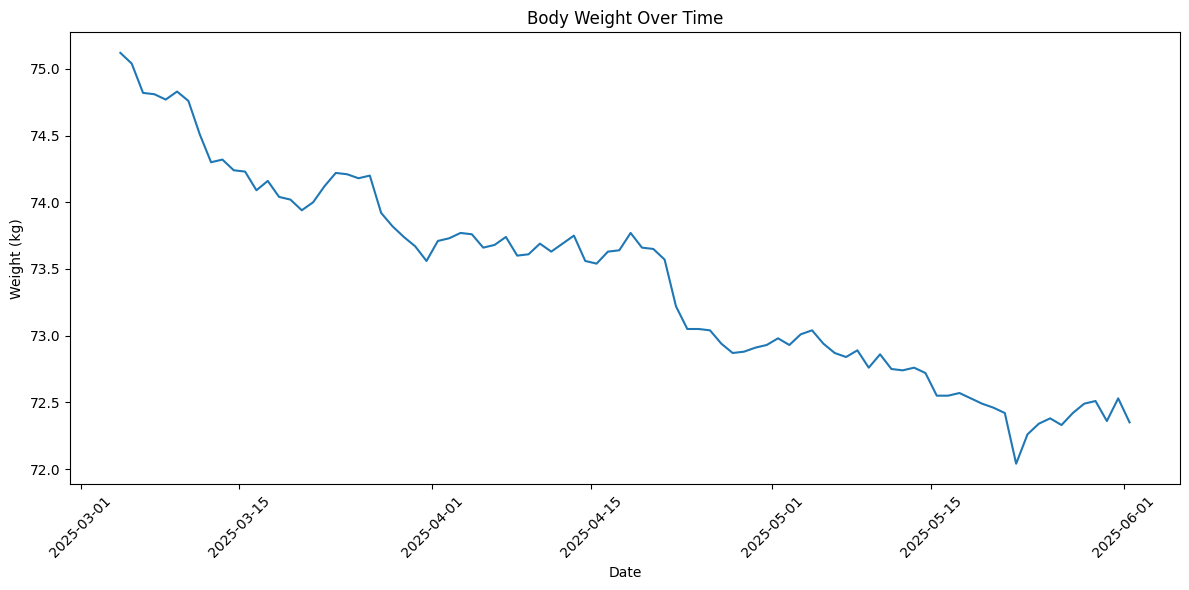

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line plot of weight over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Weight (kg)', data=df)
plt.title('Body Weight Over Time')
plt.xlabel('Date')
plt.ylabel('Weight (kg)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


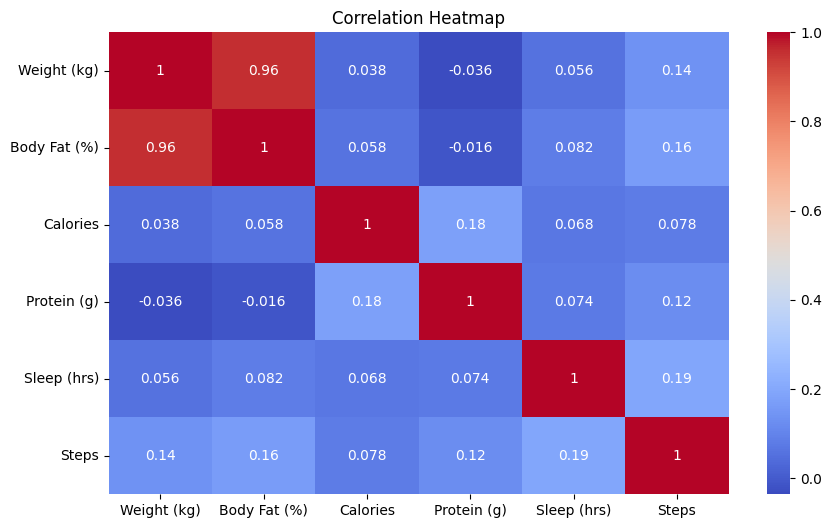

In [38]:
# Correlation heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


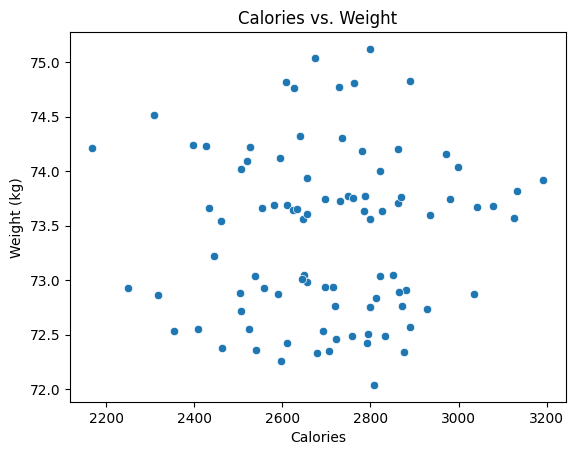

In [39]:
sns.scatterplot(data=df, x='Calories', y='Weight (kg)')
plt.title('Calories vs. Weight')
plt.show()


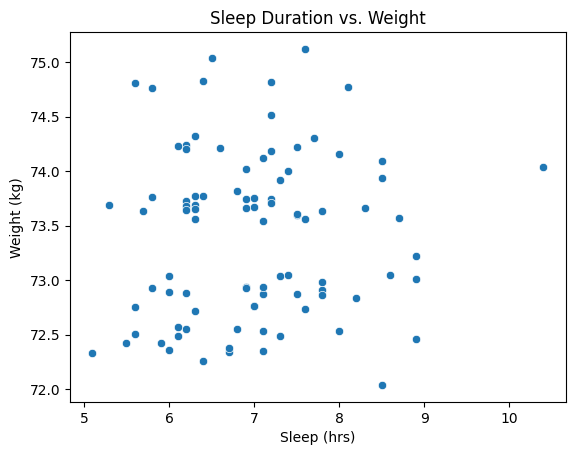

In [40]:
sns.scatterplot(data=df, x='Sleep (hrs)', y='Weight (kg)')
plt.title('Sleep Duration vs. Weight')
plt.show()


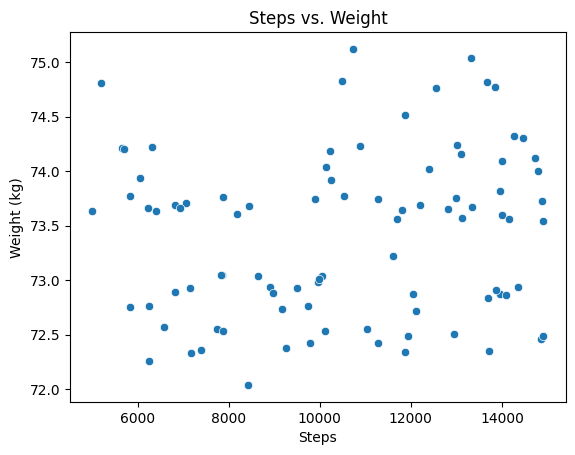

In [41]:
sns.scatterplot(data=df, x='Steps', y='Weight (kg)')
plt.title('Steps vs. Weight')
plt.show()


In [61]:
df.columns

Index(['Date', 'Weight (kg)', 'Body Fat (%)', 'Calories', 'Protein (g)',
       'Workout Type', 'Sleep (hrs)', 'Steps'],
      dtype='object')

In [69]:
# Example
X = df[['Weight (kg)','Calories', 'Protein (g)', 'Sleep (hrs)', 'Steps']]
y = df['Body Fat (%)']


In [70]:
X.head()

,Weight (kg),Calories,Protein (g),Sleep (hrs),Steps
0,75.12,2799.3,147.9,7.6,10734
1,75.04,2675.2,119.8,6.5,13322
2,74.82,2607.3,143.0,7.2,13666
3,74.81,2762.8,136.4,5.6,5189
4,74.77,2728.5,149.5,8.1,13838


In [101]:
df[['Body Fat (%)']]

,Body Fat (%)
0,17.93
1,17.94
2,17.87
3,17.81
4,17.76
...,...
85,16.56
86,16.51
87,16.43
88,16.42


In [72]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.25)

In [73]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
#y_train_scaled=scaler.transform(y_train)

In [90]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
regression=LinearRegression()
regression.fit(X_train_scaled,y_train)
y_pred=regression.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
train_score=regression.score(X_train_scaled,y_train)
test_score=regression.score(X_test_scaled,y_test)
print("mean_absolute_error:",mse)
print("mean_squared_error:",mae)
print("r2_Score:",score)
print("Train Data Score :",train_score)
print("Test Data Score :",test_score)


mean_absolute_error: 0.009705437336866676
mean_squared_error: 0.08341040460618866
r2_Score: 0.9308370084571219
Train Data Score : 0.913728268625827
Test Data Score : 0.9308370084571219


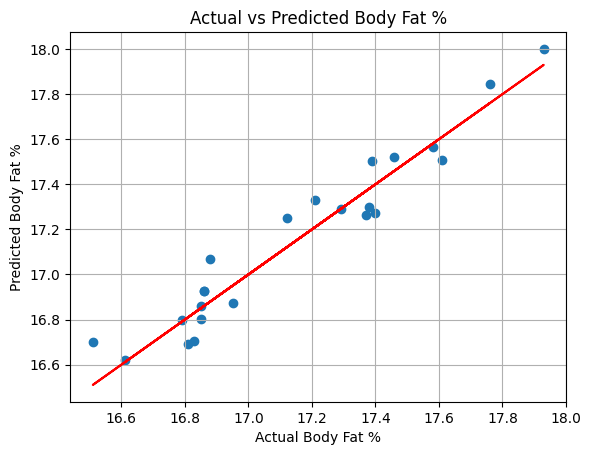

In [92]:
plt.scatter(y_test, y_pred)
plt.plot(y_test, y_test, color='red')  # Line of perfect predictions
plt.xlabel("Actual Body Fat %")
plt.ylabel("Predicted Body Fat %")
plt.title("Actual vs Predicted Body Fat %")
plt.grid(True)
plt.show()


Ridge Regressor

In [ ]:
ridge=Ridge()
ridge.fit(X_train_scaled,y_train)
y_pred=ridge.predict(X_test_scaled)
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
score=r2_score(y_test,y_pred)
train_score=regression.score(X_train_scaled,y_train)
test_score=regression.score(X_test_scaled,y_test)
print("mean_absolute_error:",mse)
print("mean_squared_error:",mae)
print("r2_Score:",score)
print("Train Data Score :",train_score)
print("Test Data Score :",test_score)

mean_absolute_error: 0.009563874283396265
mean_squared_error: 0.08312994907827409
r2_Score: 0.9318458166055983
Train Data Score : 0.913728268625827
Test Data Score : 0.9308370084571219


In [ ]:
import pickle

# Let's say our trained model is stored in a variable called `regression`
filename = 'body_fat_model.sav'

# Save the model to disk
with open(filename, 'wb') as file:
    pickle.dump(regression, file)


In [ ]:
#Save the scaler
with open('scaler.sav', 'wb') as file:
    pickle.dump(scaler, file)